In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
import time
from IPython.display import clear_output
import os
import random
import time
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,4
sns.set_theme()

### Datos
Simulación de datos No lineales con 
$\mathbf{x}\in \mathbb{R}^{n}$ y $\mathbf{y}\in \mathbb{R}^{n}$.

$$\mathbf{x}=
\begin{pmatrix}
x_1\\ 
x_2\\ 
x_3\\ 
\vdots \\ 
x_n\\ 
\end{pmatrix} \mathbf{y}=
\begin{pmatrix}
y_1\\ 
y_2\\ 
y_3\\ 
\vdots \\ 
y_n\\ 
\end{pmatrix}$$

Modelo matemático $y_i=e^{x_i^2+3x_i+2}$

In [2]:
#Simulación con ruido gausiano
n = 200
x = np.linspace (0,1, n)                                            # Genera datos que contienen ruido
a1, b1, c1 = 1,3,2                                                  # Este es el parámetro real de la función y (x) que debe ajustarse
y = [np.exp(a1*i**2+b1*i+c1)+random.gauss(0,4) for i in x]
df=pd.DataFrame({'x': x, 'y': y})

Text(3.1750000000000043, 0.5, 'salidas')

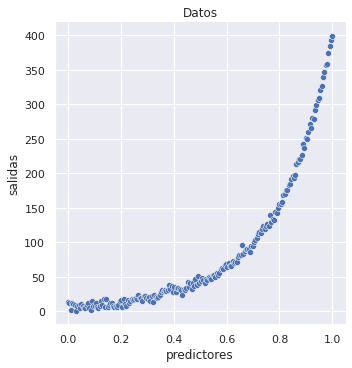

In [3]:
sns.relplot(x='x', y='y', data=df)
plt.title('Datos')
plt.xlabel('predictores')
plt.ylabel('salidas')

Ahora bien, si asumimos el error como un error cuadrático medio, entonces el error de esa i-ésima observación se puede expresar como:
$$l_i=\frac{1}{2}(\hat{y_i}-y_i)^{2}$$

En consecuencia, el error total ($L$) asociado al modelo viene siendo la contribución del error de cada una de las observaciones. Es decir:
$$L=\frac{1}{n}\sum_{i=1}^{n}l_i$$
$$L=\frac{1}{2n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^{2}$$

Esta ecuación es conocida como la función de pérdida y también se la puede encontrar en la regresión lineal mediante el método de mínimos cuadrados ordinarios. 

De hecho, en este caso la ecuación hace parte del dicho método ya que estamos asumiendo un modelo lineal del tipo $\hat{y}=wx+b$. Por lo tanto, esta expresión la podemos modificar como:

$$L=\frac{1}{2n}\sum_{i=1}^{n}(wx_i+b-y_i)^{2}$$

Los valores $x_i$ y $y_i$ son los conjuntos de observaciones, por consiguiente, el error del modelo quedaría unicamente en función de $w$ y $b$. Entonces, el modelo más eficiente vendría siendo el modelo cuyos parámetros minimicen el valor de $L$. 

### Solución por gradiente descendente

El gradiente descendente, es el método por el cual se trata de encontrar los parámetros que generen el menor valor en la función de pérdida. No obstante, este no se hace por métodos análiticos sino por una serie de pasos secuenciales.

En términos concretos el gradiente consiste en:

1. Seleccionar un $w$ aleatoriamente.
2. Evaluar la función de pérdida con ese $w$.
$$L(w)=\frac{1}{2n}(w\mathbf{x}-\mathbf{y})^{t}(w\mathbf{x}-\mathbf{y})$$
3. Calcular la derivada de la función de pérdida con ese primer $w$.
$$\frac{dL(w)}{dw}=\frac{1}{2n}[\mathbf{x}^{t}(w\mathbf{x}-\mathbf{y})+(w\mathbf{x}-\mathbf{y})^{t}\mathbf{x}]$$
4. Una vez calculados estos valores, se genera un nuevo $w$ como el valor inicial menos el valor de la derivada multiplicado por un factor $\eta$. Es decir:

$$w_1\leftarrow w_0-\eta\frac{dL}{dw}(w_0)$$

- El factor $\eta$ es conocido como tasa de aprendizaje
5. El proceso se repite iterativamente, donde el $w$ de la nueva iteración se genera con el $w$ anterior.

$$w_i\leftarrow w_{i-1}-\eta\frac{dL}{dw}(w_{i-1})$$

6. Finalmente, el proceso se detiene cuando el valor absoluto de la derivada se aproxime a cero.

Nota: como a $w$ se le resta la derivada (es decir de la pendiente), este valor comienza a variar en la dirección hacia donde se reduce la función de pérdida.

Esto lo podemos implementar de la siguiente forma:

In [4]:
def resultados(w,L, dL, ws, Ls):
  ws=np.append(ws,w)
  Ls=np.append(Ls,L)
  
  print('pendiente w=', w)
  print('Pérdida L=', L)
  print('Derivada dL/dw=', dL)

  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  plt.plot(x, y,'ob', label="y reales")
  plt.title('Datos')
  plt.xlabel('x')
  plt.ylabel('salidas (ys)')
  tx=np.linspace(0,1,100)
  plt.plot(tx, w*tx, 'g', label="y predicha")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(ws,Ls, '.b')
  plt.plot(w,L, '*r')
  plt.xlim((20, 380))
  plt.title('Función de pérdida')
  plt.xlabel('peso w')
  plt.ylabel('valor de FP')

  plt.show()

  return ws, Ls

pendiente w= 204.78461210605894
Pérdida L= 65555383.649059534
Derivada dL/dw= -4.572799503006308


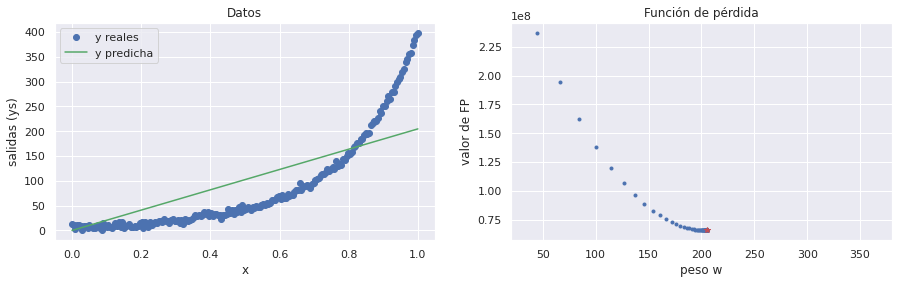

La implementación llegó a la iteración  91
204.78465783405397 64.30140423774719


In [5]:
ws=[]
Ls=[]

tic=time.time()

#Selección aleatoria
w=np.random.randint(70,100)*(np.random.randint(2,4)-2.5)

#Bucle simulando las iteraciones
for i in range(200):

  #Calculo de la función de pérdida y su derivada
  L=(1/2*len(x))*np.dot(np.transpose(w*(x)-y),w*(x)-y)
  dL=(1/2*len(x))*(np.dot(np.transpose(x),w*(x)-y)+np.dot(np.transpose(w*(x)-y),x))

  #Tasa de aprendizaje
  eta=0.00001

  #Graficas (resultados)
  ws, Ls=resultados(w,L, dL, ws, Ls)

  #Cálculo del nuevo w
  w=w-eta*dL

  if np.abs(dL)<5:
    print('La implementación llegó a la iteración ', i)
    break

  time.sleep(0.1)
  clear_output(wait=True)

toc=time.time()-tic
print(w, toc)